In [145]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


import os
print(os.listdir("/Users/trish/Downloads/Python/"))
import warnings
warnings.filterwarnings('ignore')

['q4_2.txt', 'combpdf.py', 'a.csv', 'Python\\exp3\\q1.txt', 'diet_planner.db', 'diet4.py', '.DS_Store', '8.png', 'Untitled-1.ipynb', 'rename.py', '9.png', 'q5_1.txt', 'cancer.csv', 'test.csv', 'panda.py', 'numpuy.py', 'exp7', 'exp1', '4.txt', 'mat.py', 'users.db', 'SPORT.py', 'imdb.csv', '3.txt', 'output.png', '2.txt', 'print("hello").py', 'user.db', 'Treading in python.ipynb', 'import requests.py', '1.txt', 'train.csv', '.ipynb_checkpoints', '4.png', 'diabetes.csv', '5.png', '7.png', '4.csv.numbers', 'diet3.py', 'test.numbers', '6.png', '2.png', 'diet.py', 'exp3', 'diet2.py', 'exp4', 'q1.txt', '3.png', 'diet.png', 'exp2', '1.png', '12.docx']


In [146]:
d = pd.read_csv('imdb.csv')
d.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [147]:
tr_r = d.review[:40000]
tr_s = d.sentiment[:40000]
te_r = d.review[40000:]
te_s = d.review[40000:]

print(te_r.shape)
d.head(10)


(10000,)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [148]:
tokeneizer = ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

d.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [149]:
def html(text):
    soup = BeautifulSoup(text , "html.parser")
    return soup.get_text()

def remove_sq_br(txt):
    return re.sub('\[[^]]*\]', '', txt)

def denoiser(txt):
    txt = html(txt)
    txt = remove_sq_br(txt)
    return txt

d['review'] = d['review'].apply(denoiser)
d.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [152]:
def remove_sp_chr(txt) :
    pat = r'[^a-zA-z0-9\s]'
    txt =   re.sub(pat,'',str(txt))
    return txt

d['review'] = d['review'].apply(remove_sp_chr)
d.head(10)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive
5,Probably my alltime favorite movie a story of ...,positive
6,I sure would like to see a resurrection of a u...,positive
7,This show was an amazing fresh innovative ide...,negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [153]:
def stemmertxt(txt):
    ps = nltk.PorterStemmer()
    txt = ' '.join([ps.stem(word) for word in txt.split()])
    return txt

d['review'] = d['review'].apply(stemmertxt)

d.head(10)

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,a wonder littl product the film techniqu is ve...,positive
2,i thought thi wa a wonder way to spend time on...,positive
3,basic there a famili where a littl boy jake th...,negative
4,petter mattei love in the time of money is a v...,positive
5,probabl my alltim favorit movi a stori of self...,positive
6,i sure would like to see a resurrect of a up d...,positive
7,thi show wa an amaz fresh innov idea in the 70...,negative
8,encourag by the posit comment about thi film o...,negative
9,if you like origin gut wrench laughter you wil...,positive


In [ ]:
sl = set(stopwords.words('english'))
print(sl)

{'between', 'who', "wasn't", "you're", 'o', 'you', 'and', 'our', 'needn', 'their', 'shan', "weren't", 'nor', 'above', 'because', 'myself', "didn't", 'from', 'before', 'about', 'we', 'doing', 'himself', "doesn't", 'was', 'yourselves', 'had', 'do', 'wouldn', 'will', 'other', 'has', 'so', "shouldn't", "hasn't", 'of', 'were', "she's", 'is', "couldn't", "wouldn't", 'further', 'again', 'most', 'through', 'weren', "you've", 'any', 'ma', 'him', 'he', 'after', 'to', 're', 'how', 'few', 'own', 'now', 'm', 'them', 'isn', 'all', "don't", 'don', 'i', 'than', 'during', 'having', 'out', 've', 'mustn', 'd', 'she', "aren't", 'itself', 'doesn', 'didn', 'only', 'with', 'then', "mustn't", 'be', 'won', 'until', 'both', 'have', 'being', 'below', 'can', "won't", "mightn't", 'same', 'your', 'ours', 'theirs', 'there', 'am', 'very', "isn't", 'shouldn', 'some', 'or', 'why', 'its', 'those', 'not', 'when', 'are', 'just', 'which', "that'll", 'too', 'it', 'here', 'mightn', 'such', "you'd", 'once', 'each', 'his', 'if

In [154]:
def remove_stop(txt, is_lower_case=False):
    tk = tokeneizer.tokenize(txt)
    tk = [i.strip() for i in tk]
    if is_lower_case:
        filter = [i for i in tk if i not in stopword_list]
    else:
        filter = [i for i in tk if i.lower() not in stopword_list]
    
    filtered_text = ' '.join(filter)
    return filtered_text

d['review'] = d['review'].apply(remove_stop)

d.head(10)



,review,sentiment
0,one review ha mention watch 1 oz episod youll ...,positive
1,wonder littl product film techniqu veri unassu...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic famili littl boy jake think zombi hi clo...,negative
4,petter mattei love time money visual stun film...,positive
5,probabl alltim favorit movi stori selfless sac...,positive
6,sure would like see resurrect date seahunt ser...,positive
7,thi show wa amaz fresh innov idea 70 first air...,negative
8,encourag posit comment thi film wa look forwar...,negative
9,like origin gut wrench laughter like thi movi ...,positive


In [155]:
normalised_train_review = d.review[:40000]
normalised_train_review[1220]

'love jurass park movi three time favorit moviesand hate thi game wa one game wish never super nintendo wa thi onehow game base classic movi aw make worst wa scare thi game wa kidhow dumb wa wa kid thi game wa first outth game play thi game odd one minut action game shooter world wrong make mind make video gameth sound game terribl listenth music sick listen toth control game dont work timejurass park game wast time money wont classicavoid cost'

In [159]:
normalised_test_review = d.review[40000:]
normalised_test_review[45055]

'starz free weekend switch station see wa wa thi movi howl ii act wa terribl eye candi wa great sybil dan marsha brown afor mention eye candi wa laugh lot scene sawmi friend wonder whi never want go horror movi saw thi film would know whi would get thrown laugh hardjust coupl trivia note reb brown play ben white play captain american made tv movi marsha brown wa mick jagger inspir song brown sugar mick ha great tast women sure'

In [161]:
#BAgs of WORDS MODEL

cv = CountVectorizer(min_df=1,max_df=1.0,binary=False,ngram_range=(1,3))

cv_train_review = cv.fit_transform(normalised_train_review)

cv_test_review = cv.transform(normalised_test_review)

print('BOW_cv_train:',cv_train_review.shape)
print('BOW_cv_test: ',cv_test_review.shape)




BOW_cv_train: (40000, 6983231)
BOW_cv_test:  (10000, 6983231)


In [163]:
# Term Frequency-Inverse DOcument Frequency model

t = TfidfVectorizer(min_df=1,max_df=1.0,binary=False,ngram_range=(1,3))
t_train_review = t.fit_transform(normalised_train_review)
t_testt_review = t.transform(normalised_test_review)
print('TFIDF_Train:- ',t_train_review.shape)
print('TFIDF_Test:- ',t_testt_review.shape)




TFIDF_Train:-  (40000, 6983231)
TFIDF_Test:-  (10000, 6983231)


In [164]:
label = LabelBinarizer()
sentiment_data = label.fit_transform(d['sentiment'])


In [168]:
train_sent = sentiment_data[:40000]
test_sent = sentiment_data[40000:]

print(train_sent , test_sent)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]] [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [172]:
#locial regression model
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr_bow = lr.fit(cv_train_review,train_sent)
print(lr_bow)
lr_tfidr = lr.fit(t_train_review,train_sent)
print(lr_tfidr)


LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [173]:
lr_bow_predict = lr.predict(cv_test_review)
lr_tfidr_predict = lr.predict(t_testt_review)
print(lr_bow_predict,lr_tfidr_predict)

[0 0 0 ... 0 0 0] [0 0 0 ... 1 0 0]


In [174]:
lr_bow_acc = accuracy_score(test_sent,lr_bow_predict)
print("lr_bow_acc" , lr_bow_acc)
lr_tfidr_acc = accuracy_score(test_sent , lr_tfidr_predict)
print("lr_tfidr_acc" , lr_tfidr_acc)


lr_bow_acc 0.8469
lr_tfidr_acc 0.8867


In [175]:
r_bow_report=classification_report(test_sent,lr_bow_predict,target_names=['Positive','Negative'])
print(r_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sent,lr_tfidr_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.81      0.90      0.85      4993
    Negative       0.89      0.79      0.84      5007

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

              precision    recall  f1-score   support

    Positive       0.89      0.88      0.89      4993
    Negative       0.88      0.89      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [176]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sent,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sent,lr_tfidr_predict,labels=[1,0])
print(cm_tfidf)

[[3980 1027]
 [ 504 4489]]
[[4459  548]
 [ 585 4408]]


In [178]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_review,train_sent)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(t_train_review,train_sent)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


In [182]:
svm_bow_predict=svm.predict(cv_test_review)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(t_testt_review)
print(svm_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 1 0 0]


In [183]:
svm_bow_score=accuracy_score(test_sent,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sent,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.8433
svm_tfidf_score : 0.8869


In [184]:
svm_bow_report=classification_report(test_sent,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sent,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.80      0.91      0.85      4993
    Negative       0.90      0.77      0.83      5007

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

              precision    recall  f1-score   support

    Positive       0.90      0.88      0.89      4993
    Negative       0.88      0.90      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [186]:
cm_bow=confusion_matrix(test_sent,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sent,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3878 1129]
 [ 438 4555]]
[[4497  510]
 [ 621 4372]]


In [188]:
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_review,train_sent)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(t_train_review,train_sent)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [190]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_review)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(t_testt_review)
print(mnb_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [191]:
mnb_bow_score=accuracy_score(test_sent,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sent,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.8783
mnb_tfidf_score : 0.8892


In [193]:
mnb_bow_report=classification_report(test_sent,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sent,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.85      0.91      0.88      4993
    Negative       0.91      0.84      0.87      5007

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

              precision    recall  f1-score   support

    Positive       0.88      0.90      0.89      4993
    Negative       0.90      0.88      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [194]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sent,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sent,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4218  789]
 [ 428 4565]]
[[4391  616]
 [ 492 4501]]


<function matplotlib.pyplot.show(close=None, block=None)>

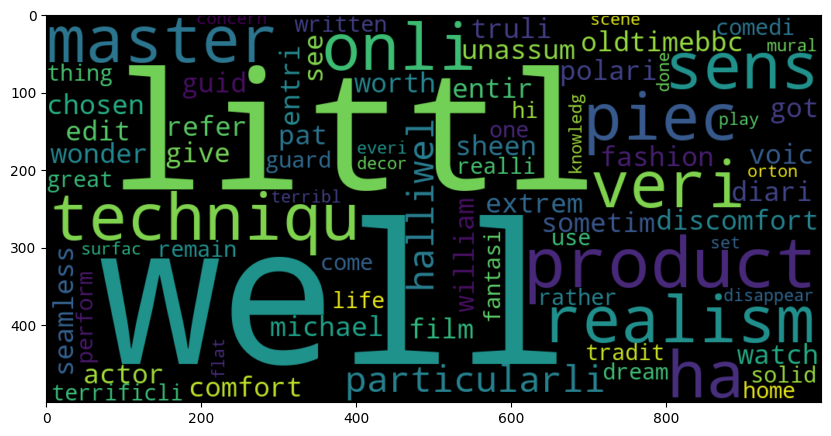

In [203]:
plt.figure(figsize=(10,10))
positive_text=normalised_train_review[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

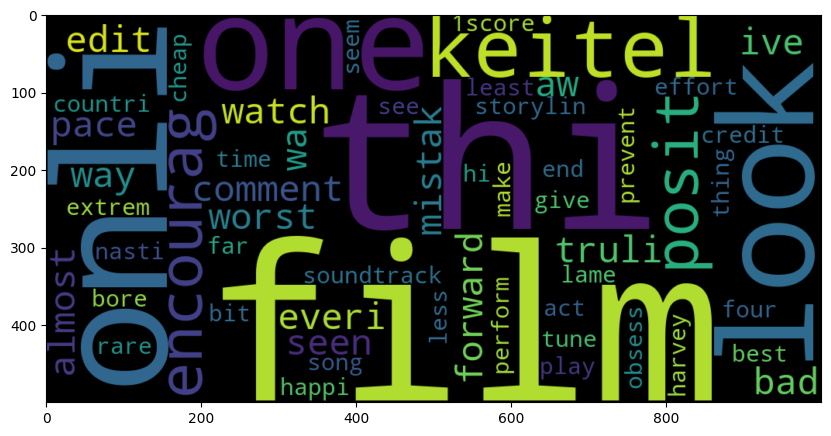

In [201]:
plt.figure(figsize=(10,10))
negative_text=normalised_train_review[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show